In [44]:
from tensorflow import keras
from tensorflow.keras import layers as L
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

SEED : int = 42

Exercice 1

1. Charger le dataset CIFAR-10

In [45]:
(X_train_cifar10, y_train_cifar10), (X_test_cifar10, y_test_cifar10) = (
    keras.datasets.cifar10.load_data()
)

2. Préparer le dataset pour l’apprentissage : normaliser les images, encoder les sorties pour un
réseau de neurones

In [4]:
X_train_cifar10 = X_train_cifar10.astype("float32") / 255
X_test_cifar10 = X_test_cifar10.astype("float32") / 255

X_validation_cifar10 = X_train_cifar10[-5000:]
y_validation_cifar10 = y_train_cifar10[-5000:]
X_train_cifar10 = X_train_cifar10[:-5000]
y_train_cifar10 = y_train_cifar10[:-5000]

3. Implémenter et tester l’architecture suivante :  
a. 1 couche Conv2D avec 32 filtres de taille 3x3, padding = same  
b. 1 couche MaxPooling2D de taille 2x2  
c. 1 couche Conv2D avec 64 filtres de taille 3x3, padding = same  
d. 1 couche MaxPooling2D de taille 2x2  
e. 1 couche Dense avec 256 et une activation Relu  
f. 1 couche Dense avec 10 neurones configurés pour la classification

In [5]:
model_cifar10 = keras.Sequential(
    [
        keras.Input(shape=(32, 32, 3)),
        keras.layers.Conv2D(32, kernel_size=(3, 3), padding="same"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), padding="same"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dense(10, activation="softmax"),
    ]
)

model_cifar10.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)
model_cifar10.fit(
    X_train_cifar10,
    y_train_cifar10,
    epochs=10,
    validation_data=(X_validation_cifar10, y_validation_cifar10),
)
train_loss_cifar10, train_acc_cifar10 = model_cifar10.evaluate(
    X_train_cifar10,
    y_train_cifar10,
    verbose=0,
)
test_loss_cifar10, test_acc_cifar10 = model_cifar10.evaluate(
    X_test_cifar10,
    y_test_cifar10,
    verbose=0,
)
print(f"Train  — loss: {train_loss_cifar10:.4f}, acc: {train_acc_cifar10:.4f}")
print(f"Test   — loss: {test_loss_cifar10:.4f}, acc: {test_acc_cifar10:.4f}")

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.4494 - loss: 1.5403 - val_accuracy: 0.6488 - val_loss: 1.0112
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6750 - loss: 0.9343 - val_accuracy: 0.6768 - val_loss: 0.9310
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7575 - loss: 0.6976 - val_accuracy: 0.7068 - val_loss: 0.9040
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8312 - loss: 0.4856 - val_accuracy: 0.7050 - val_loss: 0.9403
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8951 - loss: 0.3143 - val_accuracy: 0.6980 - val_loss: 1.0878
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9339 - loss: 0.2007 - val_accuracy: 0.7022 - val_loss: 1.2598
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9559 - loss: 0.1357 - val_accuracy: 0.6916 - val_loss: 1.4889
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9645 - loss: 0.1074 -

4. Comparer les résultats de l’apprentissage avec les MLP développés dans le TD précédent, en
performance et en nombre de paramètres. Evaluer la capacité de ce réseau à généraliser de
cette architecture.

5. Modifier l’architecture précédente pour améliorer les résultats obtenus.

Exercice 2  
Cet exercice a pour but de manipuler un opérateur de convolution afin de repérer les arêtes sur une
image.

1. Télécharger le dataset ‘stanford_dogs’ directement depuis votre notebook :

import tensorflow_datasets as tfds

La méthode tfds.load permet de télécharger des datasets. Utilisez cette méthode en téléchargeant
également les métadonnées (infos), en mode supervisé, et avec un split ‘train, test’.

In [6]:
(ds_train_stanford_dogs, ds_test_stanford_dogs), ds_info_stanford_dogs = tfds.load(
    "stanford_dogs", split=["train", "test"], with_info=True, as_supervised=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/stanford_dogs/incomplete.AWHHD1_0.2.0/stanford_dogs-train.tfrecord*...:   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/stanford_dogs/incomplete.AWHHD1_0.2.0/stanford_dogs-test.tfrecord*...:   0…

Dataset stanford_dogs downloaded and prepared to /root/tensorflow_datasets/stanford_dogs/0.2.0. Subsequent calls will reuse this data.


2. Récupérez le nombre de classes à partir des informations. Combien y at’il de classes ?

In [7]:
num_classes = ds_info_stanford_dogs.features['label'].num_classes
print("num_classes:", num_classes)

num_classes: 120


3. Visualisez les premières images du dataset à l’aide de la méthode show_examples

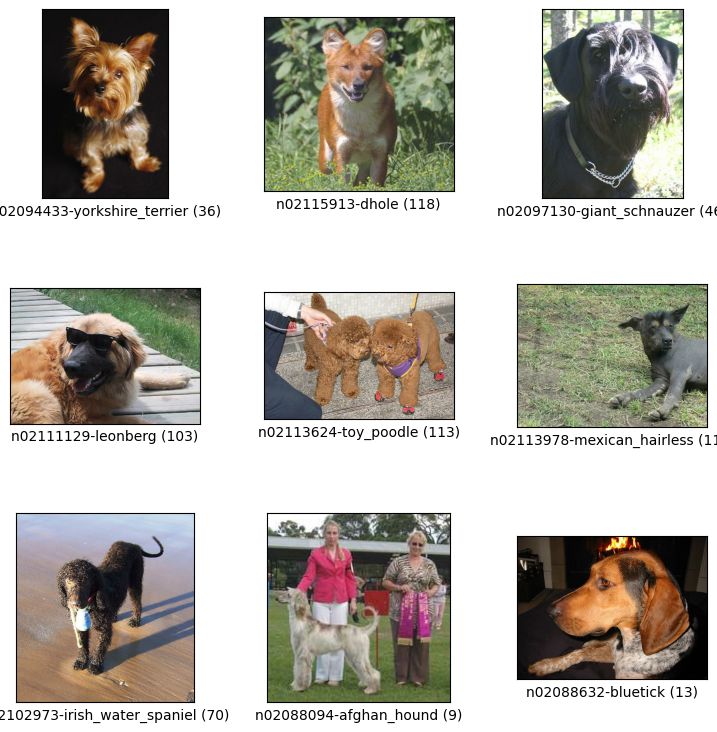

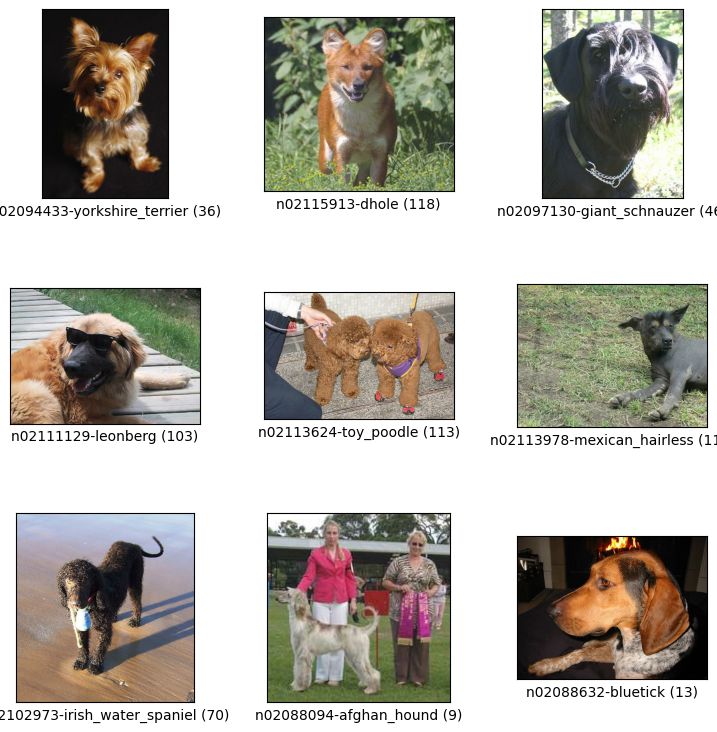

In [8]:
tfds.visualization.show_examples(ds_train_stanford_dogs, ds_info_stanford_dogs)

4. Récupérez la première image. Cela peut se faire avec next et iter, ou bien avec take et
get_single_element. Attention, n’oubliez pas que ces méthodes récupères un tuple (image, label).

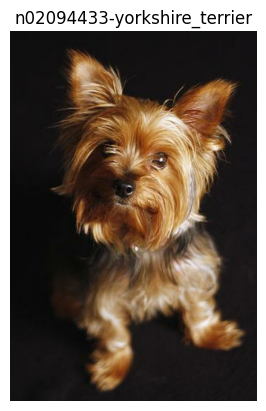

In [9]:
(image, label) = tf.data.Dataset.get_single_element(ds_train_stanford_dogs.take(1))

class_name = ds_info_stanford_dogs.features['label'].int2str(int(label.numpy()))

plt.imshow(image.numpy())
plt.title(class_name)
plt.axis('off')
plt.show()

5. Convertissez cette image en grayscale (nécessite d’installer tensorflow_io) avec
rgb_to_grayscale.

In [10]:
!pip install tensorflow_io --q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 54.6 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/usr/local/lib/python3.12/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/usr/local/lib/python3.12/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl5mutex6unlockEv']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/usr/local/lib/python3.12/dist-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/usr/local/lib/python3.12/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/usr/local/lib/python3.12/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZN3tsl7strings13safe_strtou64ESt17basic_string_viewIcSt11char_traitsIcEEPm']
  warnings.warn(

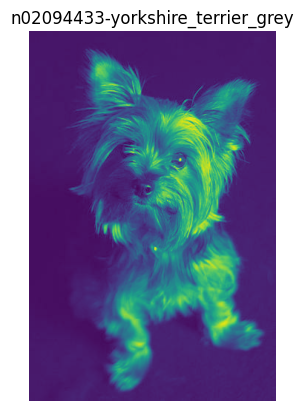

In [11]:
import tensorflow_io as tfio

image_gray = tfio.experimental.color.rgb_to_grayscale(image)
image_gray = tf.image.convert_image_dtype(image_gray, tf.float32)

plt.imshow(image_gray.numpy())
plt.title(f"{class_name}_grey")
plt.axis('off')
plt.show()

6. Une couche de convolution va être appliquée sur l’image grayscale. En tensorflow, les données
sont transmises aux différentes couches des réseaux de neurones par batch. Il faut donc rajouter une
dimension devant l’image pour représenter le batch. Dans un premier temps, vérifier les dimensions
de l’image (avec np.shape par exemple). Ajoutez une dimension avec expand_dims, puis vérifiez le
résultat.

In [12]:
print("Before:", image_gray.shape)
image_gray_batch = tf.expand_dims(image_gray, axis=0)
print("After:", image_gray_batch.shape)

Before: (500, 333, 1)
After: (1, 500, 333, 1)


7. Définissez un noyau de convolution, à l’aide d’un array numpy à 2 dimensions. Chacune des
dimenions devra contenir 3 éléments de type float32. Définissez les valeurs vous-même,
manuellement.

In [13]:
k2d = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
], dtype=np.float32)


8. Vous allez maintenant appliquer le noyau de convolution sur l’image grayscale, à l’aide de
tf.nn.conv2d. Utilisez un stride de 1 et un padding ‘SAME’. Le noyau doit avoir les bonnes
dimensions pour être utilisé par conv2d. Il faut le redimensionner à l’aide de tf.reshape. Les
dimensions sont [hauteur, largeur, canaux_entrants, canaux_sortant]. Appliquez le filtre et visualisez
l’image en mode ‘grayscale’ (plt.imshow(..., cmap = ‘grayscale’))

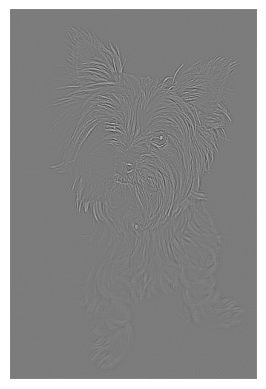

In [14]:
kernel = tf.constant(k2d, dtype=tf.float32)
kernel = tf.reshape(kernel, [3, 3, 1, 1])

image_gray_batch_conv = tf.nn.conv2d(image_gray_batch, kernel, strides=[1, 1, 1, 1], padding='SAME')
image_gray_batch_conv = tf.squeeze(image_gray_batch_conv, axis=[0, -1])

plt.imshow(image_gray_batch_conv.numpy(), cmap='gray')
plt.axis('off')
plt.show()

9.  Maintenant que vous savez appliquer un noyau, améliorez votre programme afin qu’il
implémente un filtre de Sobel :
https://fr.wikipedia.org/wiki/Filtre_de_Sobel

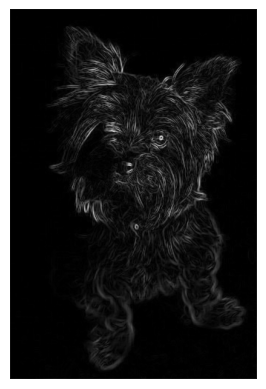

In [15]:
sobel_x = tf.constant([[-1, 0, 1],
                       [-2, 0, 2],
                       [-1, 0, 1]], dtype=tf.float32)
sobel_y = tf.transpose(sobel_x)

sobel_x = tf.reshape(sobel_x, [3, 3, 1, 1])
sobel_y = tf.reshape(sobel_y, [3, 3, 1, 1])

gx = tf.nn.conv2d(image_gray_batch, sobel_x, strides=[1, 1, 1, 1], padding='SAME')
gy = tf.nn.conv2d(image_gray_batch, sobel_y, strides=[1, 1, 1, 1], padding='SAME')

g = tf.sqrt(tf.square(gx) + tf.square(gy))
g = tf.squeeze(g, axis=[0, -1])

plt.imshow(g.numpy(), cmap='gray')
plt.axis('off')
plt.show()


Exercice 3  
 Dans cet exercice, nous allons manipuler le dataset d’image afin de le préparer pour un
apprentissage.

1. Télécharger le dataset ‘stanford_dogs‘ depuis votre notebook avec les mêmes options que dans
l’exercice précédent. Normalement, le dataset est déjà sur votre machine. Cette opération devrait
donc être très rapide cette fois.


2. Le dataset est composé d’un jeu d’entraînement et d’un jeu de test. Pour chacun de ces jeux, vous
allez appliquer une transformation sur les labels. Les labels sont décrits par défaut comme des
nombres entiers, vous allez les convertir avec un encodage ‘one_hot’. Pour réaliser cela, vous
pouvez vous aider de la fonction map qui peut être appliquée sur un dataset, ainsi que de la fonction
de Tensorflow one_hot.

In [16]:
def to_one_hot(image, label):
    label_oh = tf.one_hot(label, depth=num_classes, dtype=tf.float32)
    return image, label_oh

ds_train_stanford_dogs = ds_train_stanford_dogs.map(to_one_hot)
ds_test_stanford_dogs = ds_test_stanford_dogs.map(to_one_hot)

3. Toutes les images n’ont pas la même taille dans le dataset. Vous allez donc appliquer des
transformations aux images pour qu’elles aient toutes les mêmes dimensions : 128x128. Ensuite,
vous allez normaliser les valeurs des pixels pour qu’elles soient entre 0 et 1 (pour aider
l’apprentissage). Pour appliquer ces transformations, vous allez utiliser une couche de
preprocessing. Celle-ci se déclare comme un modèle Sequential auquel vous passerez en paramètre
une couche Resizing ainsi qu’une couche Rescaling). Pour commencer, appliquer cette procédure sur
une seule image.

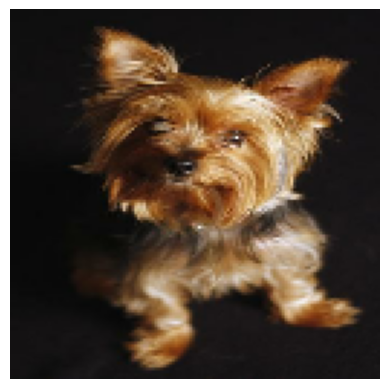

In [17]:
preprocessing_stanford_dogs = keras.Sequential(
    [
      keras.layers.Resizing(128, 128),
      keras.layers.Rescaling(1./255)
    ],
    name="img_preprocess",
)

image, label = tf.data.Dataset.get_single_element(ds_train_stanford_dogs.take(1))
image = preprocessing_stanford_dogs(image)

plt.imshow(image.numpy())
plt.axis('off')
plt.show()

4. Appliquez les transformations à l’ensemble du dataset à l’aide de la fonction map.

In [18]:
def preprocess_stanford_dogs(image, label):
    image = preprocessing_stanford_dogs(image)
    return image, label

ds_train_stanford_dogs = ds_train_stanford_dogs.map(preprocess_stanford_dogs)
ds_test_stanford_dogs = ds_test_stanford_dogs.map(preprocess_stanford_dogs)

5. Similairement, il est possible de faire de l’augmentation de données à l’aide de couches de preprocessing. Différents types de couches sont disponibles :  
• RandomBrightness  
• RandomContrast  
• RandomFlip  
• RandomRotation  
• RandomTranslation  
• RandomZoom  
• ...

Expérimentez les différentes transformations en testant leur effet sur une image. Vous pouvez
combinez plusieurs transformations dans la même couche de preprocessing.  
Nota bene : lorsque vous appliquerez ces transformation à un jeu de donnée, il ne faudra les
appliquer que sur l’ensemble d’apprentissage.

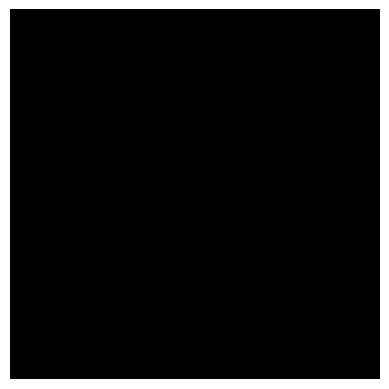

In [19]:
image, label = tf.data.Dataset.get_single_element(ds_train_stanford_dogs.take(1))
image = keras.layers.RandomBrightness(factor=1, seed=SEED)(image)

plt.imshow(image.numpy())
plt.axis('off')
plt.show()

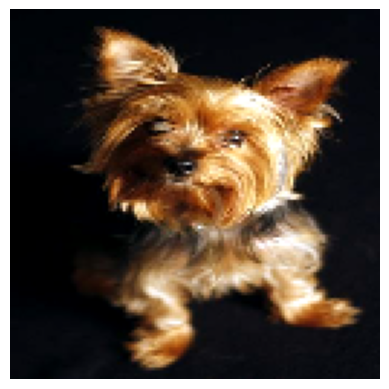

In [20]:
image, label = tf.data.Dataset.get_single_element(ds_train_stanford_dogs.take(1))
image = tf.image.convert_image_dtype(image, tf.float32)
image = keras.layers.RandomContrast(factor=1, seed=SEED)(image)

plt.imshow(image.numpy())
plt.axis('off')
plt.show()

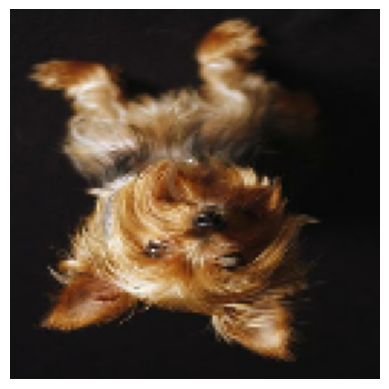

In [21]:
image, label = tf.data.Dataset.get_single_element(ds_train_stanford_dogs.take(1))
image = keras.layers.RandomFlip(seed=SEED)(image)

plt.imshow(image.numpy())
plt.axis('off')
plt.show()

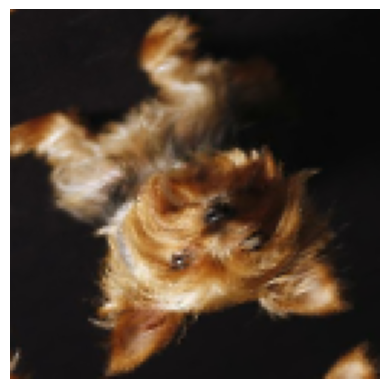

In [22]:
image, label = tf.data.Dataset.get_single_element(ds_train_stanford_dogs.take(1))
image = keras.layers.RandomRotation(factor=1, seed=SEED)(image)

plt.imshow(image.numpy())
plt.axis('off')
plt.show()

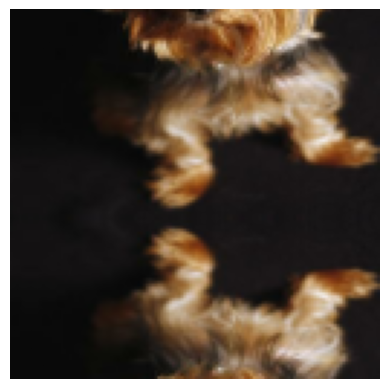

In [23]:
image, label = tf.data.Dataset.get_single_element(ds_train_stanford_dogs.take(1))
image = keras.layers.RandomTranslation(height_factor=1, width_factor=1, seed=SEED)(image)

plt.imshow(image.numpy())
plt.axis('off')
plt.show()

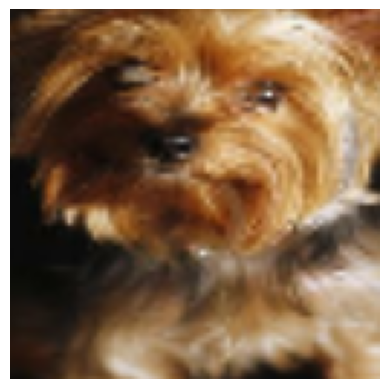

In [24]:
image, label = tf.data.Dataset.get_single_element(ds_train_stanford_dogs.take(1))
image = keras.layers.RandomZoom(height_factor=1, seed=SEED)(image)

plt.imshow(image.numpy())
plt.axis('off')
plt.show()

Exercice 4  
 Dans cet exercice, nous allons créer un réseau de neurones convolutionnel et le tester sur un jeu de
données.

1. Téléchargez et préparez le dataset ‘beans’ pour l’entrainement.

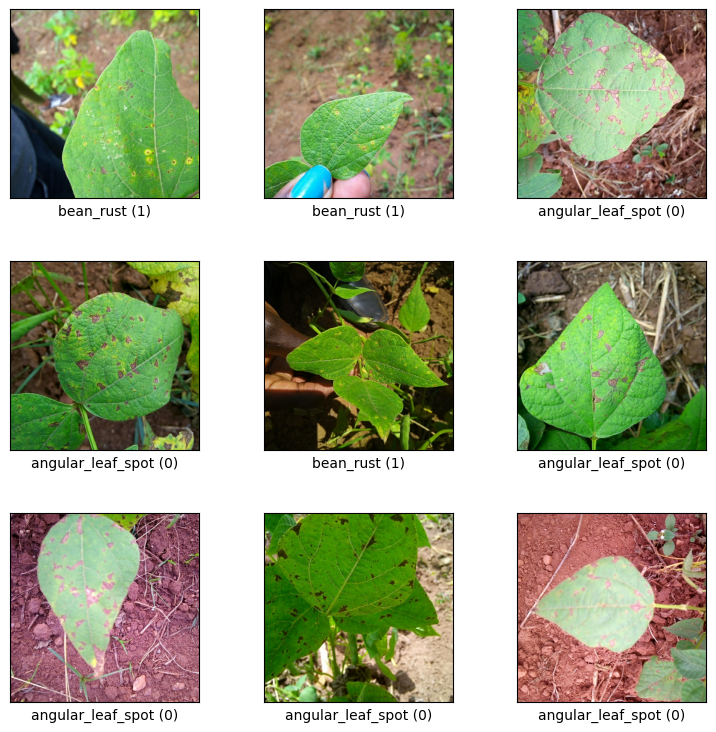

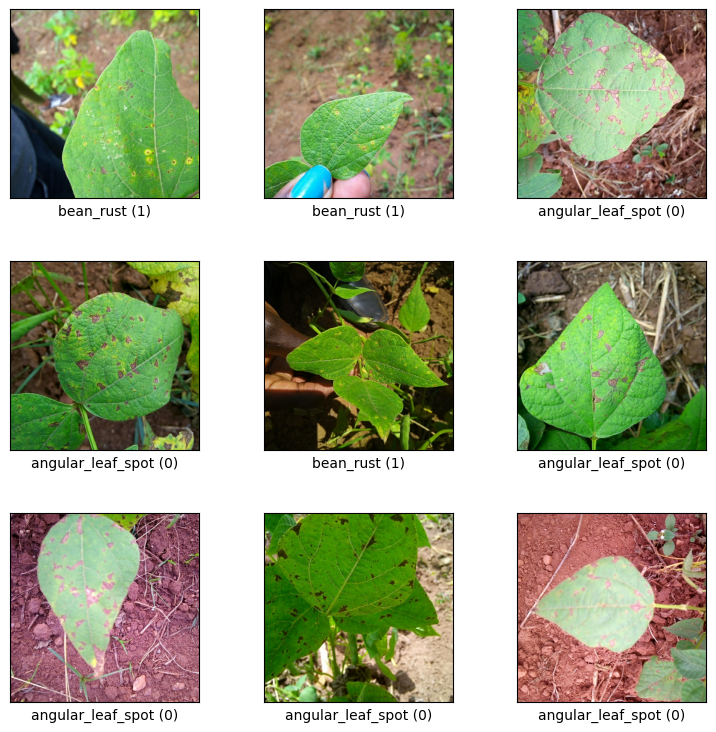

In [33]:
(ds_train_beans, ds_val_beans, ds_test_beans), ds_info_beans = tfds.load(
    "beans",
    split=["train", "validation", "test"],
    with_info=True,
    as_supervised=True
)

tfds.visualization.show_examples(ds_train_beans, ds_info_beans)

2. Implémentez une fonction qui retourne un réseau de neurones convolutionnel. Pour cela, vous
allez créer un modèle Sequential vide auquel vous allez ajouter une série de couches Conv2D et
MaxPooling2D. Le modèle suivra l’architecture des réseaux VGG : 1 bloc  VGG est constitué de 2
couches convolutionnelles (padding : ‘same’) suivies d’une couche MaxPooling2D. Votre réseau
doit contenir 3 blocs avec des nombres de filtres en sortie des couches convolutionnelles différents
dans chaque : 32 dans le premier bloc, 64 dans le second et 128 dans le troisième.

Vous terminerez votre réseau avec une couche Flatten() et une couche Dense. Attention à bien
paramétrer les couches pour que tout soit compatible avec les données en entrée. N’oubliez pas
d’ajouter les fonctions d’activations appropriées.

In [48]:
def build_VGG_network(input_shape=(None, None, 3), num_classes=3, dense_units=128):
    model = keras.Sequential()

    model.add(L.Input(shape=input_shape))
    model.add(L.Resizing(128, 128))
    model.add(L.Rescaling(1./255.0))

    for i in [32, 64, 128]:
        model.add(L.Conv2D(i, 3, padding="same", activation="relu", kernel_initializer="he_normal"))
        model.add(L.Conv2D(i, 3, padding="same", activation="relu", kernel_initializer="he_normal"))
        model.add(L.MaxPooling2D(2))

    model.add(L.Flatten())
    model.add(L.Dense(dense_units, activation="relu", kernel_initializer="he_normal"))
    model.add(L.Dense(num_classes, activation="softmax"))

    return model


3. Compilez votre réseau avec compile,  et affichez le détail de l’architecture créée. Observez le
nombre de paramètres pour chaque couche. La première couche convolutionnelle doit contenir 896
paramètres et la seconde 9248. Pourquoi ces nombres ? Comment calculer le nombre de paramètres
d’une couche convolutionnelle ?

In [54]:
VGG = build_VGG_network()

VGG.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

VGG.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing_3 (Resizing)           │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_3 (Rescaling)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,481,827 (17.10 MB)

 Trainable params: 4,481,827 (17.10 MB)

 Non-trainable params: 0 (0.00 B)

4. Entrainez le sur le dataset avec fit pendant 50 epochs. Lors de l’entrainement, utilisez un
ensemble de validation avec 10 % des données. Lors de l’appel à fit, récupérez le résultat dans une
variable history (history = mon_reseau.fit(...)). Utilisez une métrique pour enregistrer l’accuracy à
chaque epoch.

In [55]:
AUTOTUNE = tf.data.AUTOTUNE
BATCH = 32

train_beans = ds_train_beans.batch(BATCH).prefetch(AUTOTUNE)
val_beans = ds_val_beans.batch(BATCH).prefetch(AUTOTUNE)
test_beans = ds_test_beans.batch(BATCH).prefetch(AUTOTUNE)

history_bean = VGG.fit(train_beans, validation_data=val_beans, epochs=50)

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 371ms/step - accuracy: 0.3340 - loss: 6.7344 - val_accuracy: 0.3308 - val_loss: 1.0971
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.3107 - loss: 1.0983 - val_accuracy: 0.3308 - val_loss: 1.0941
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.3269 - loss: 1.0967 - val_accuracy: 0.3609 - val_loss: 1.0859
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.3689 - loss: 1.0899 - val_accuracy: 0.4211 - val_loss: 1.0874
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.4613 - loss: 1.0494 - val_accuracy: 0.5789 - val_loss: 0.9577
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.5658 - loss: 0.9132 - val_accuracy: 0.6165 - val_loss: 0.8926
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.6279 - loss: 0.8318 - val_accuracy: 0.5414 - val_loss: 0.9461
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.6921 - loss: 0.7447 - val_accuracy: 0.4586 -

5. Une fois l’entrainement terminé, utlisez le contenu de history pour tracer des courbes d’évolution
de la loss et de l’accuracy, sur les ensembles d’entrainement et de validation.

In [60]:
import plotly.graph_objects as go

def plot_history_interactive(history):
    hist = history.history
    epochs = list(range(1, len(hist["loss"]) + 1))

    # --- LOSS ---
    fig1 = go.Figure()
    fig1.add_trace(go.Scatter(x=epochs, y=hist["loss"],
                              mode="lines+markers", name="Entraînement"))
    fig1.add_trace(go.Scatter(x=epochs, y=hist["val_loss"],
                              mode="lines+markers", name="Validation"))
    fig1.update_layout(
        title="Évolution de la loss",
        xaxis_title="Époque",
        yaxis_title="Loss",
        hovermode="x unified"
    )
    fig1.show()

    # --- ACCURACY ---
    acc_key = "accuracy" if "accuracy" in hist else "acc"
    val_acc_key = "val_accuracy" if "val_accuracy" in hist else "val_acc"

    fig2 = go.Figure()
    fig2.add_trace(go.Scatter(x=epochs, y=hist[acc_key],
                              mode="lines+markers", name="Entraînement"))
    fig2.add_trace(go.Scatter(x=epochs, y=hist[val_acc_key],
                              mode="lines+markers", name="Validation"))
    fig2.update_layout(
        title="Évolution de l’accuracy",
        xaxis_title="Époque",
        yaxis_title="Accuracy",
        hovermode="x unified"
    )
    fig2.show()

plot_history_interactive(history_bean)


6. Pour finir, testez le réseau sur des données non observées lors de l’entrainement. Le résultat est-il
satisfaisant ?

In [59]:
test_beans_loss, test_beans_acc = VGG.evaluate(test_beans)

print(f"Loss sur le test : {test_beans_loss:.4f}")
print(f"Accuracy sur le test : {test_beans_acc:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6448 - loss: 4.4071
Loss sur le test : 3.7649
Accuracy sur le test : 0.6641


Exercice 5  
L’objectif de cet exercice est d’améliorer les performances du réseau.

1. Sans changer l’architecture globale que vous aviez choisi, améliorez les performances de votre
réseau en utilisant tous les mécanismes à votre disposition. Vous pouvez par exemple ajouter une
couche d’augmentation de données au début de votre modèle, des couches de Dropout, de
BatchNormalization.

2. Entrainez à nouveau votre réseau et réglez les differents paramètres pour obtenir un apprentissage
satisfaisant, avec des courbes d’entrainement et de validation proches l’une de l’autre.